In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set(style="whitegrid")

In [2]:
RAW_DATA_PATH = "../data/raw/training_data_trees.npz"
OUT_DIR = "../src/visualization/plots"
os.makedirs(OUT_DIR, exist_ok=True)

In [3]:
def savefig(fig, name):
    path = os.path.join(OUT_DIR, name)
    fig.savefig(path, bbox_inches='tight', dpi=150)
    print(f"Saved: {path}")

In [4]:
d = np.load(RAW_DATA_PATH)
X = d['X']
y = d['y']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (500000, 20)
y shape: (500000,)


In [5]:
# prefix (10 columns): p0..p9
# prefix_min, prefix_max, prefix_mean, prefix_std, realized_vol -> 5 cols
# params: K, T, r, sigma, option_flag -> 5 cols


col_prefix = [f"p{i}" for i in range(10)]
col_stats = ["p_min","p_max","p_mean","p_std","realized_vol"]
col_params = ["K","T","r","sigma","option_flag"]
n_cols = col_prefix + col_stats + col_params

In [6]:
DF = pd.DataFrame(X, columns=n_cols)
DF['y'] = y

In [7]:
DF.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p_max,p_mean,p_std,realized_vol,K,T,r,sigma,option_flag,y
0,100.0,100.083337,98.973086,97.277224,95.408206,92.811349,94.599367,97.001497,99.401111,99.619927,...,100.083337,97.517510,2.413912,0.018723,107.680300,1.471700,0.042786,0.150909,1.0,0.000000
1,100.0,93.743546,85.290922,84.628036,84.678542,81.330159,87.543339,87.673357,79.640335,85.519139,...,100.000000,87.004738,5.636176,0.059444,76.849779,1.706512,0.013383,0.320549,2.0,0.977421
2,100.0,94.034533,92.000461,89.114757,94.192492,94.994238,96.465186,99.437482,99.119474,100.905999,...,100.905999,96.026462,3.651989,0.033162,107.680300,1.471700,0.042786,0.150909,1.0,21.571230
3,100.0,99.737157,93.718317,92.496098,92.019298,96.243908,97.919620,95.641929,85.477883,85.433950,...,100.000000,93.868816,4.940701,0.043227,139.289322,1.112546,0.023362,0.400613,0.0,86.266430
4,100.0,102.040256,101.995923,101.645033,102.045052,101.942026,95.615045,94.785086,92.624436,93.899861,...,102.045052,98.659272,3.726452,0.023325,85.901509,0.228578,0.015756,0.302961,2.0,0.996405


In [8]:
DF['option_flag'] = DF['option_flag'].astype(int).map({0:'put',1:'call',2:'digital',3:'asian'})

In [9]:
DF.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p_max,p_mean,p_std,realized_vol,K,T,r,sigma,option_flag,y
0,100.0,100.083337,98.973086,97.277224,95.408206,92.811349,94.599367,97.001497,99.401111,99.619927,...,100.083337,97.517510,2.413912,0.018723,107.680300,1.471700,0.042786,0.150909,call,0.000000
1,100.0,93.743546,85.290922,84.628036,84.678542,81.330159,87.543339,87.673357,79.640335,85.519139,...,100.000000,87.004738,5.636176,0.059444,76.849779,1.706512,0.013383,0.320549,digital,0.977421
2,100.0,94.034533,92.000461,89.114757,94.192492,94.994238,96.465186,99.437482,99.119474,100.905999,...,100.905999,96.026462,3.651989,0.033162,107.680300,1.471700,0.042786,0.150909,call,21.571230
3,100.0,99.737157,93.718317,92.496098,92.019298,96.243908,97.919620,95.641929,85.477883,85.433950,...,100.000000,93.868816,4.940701,0.043227,139.289322,1.112546,0.023362,0.400613,put,86.266430
4,100.0,102.040256,101.995923,101.645033,102.045052,101.942026,95.615045,94.785086,92.624436,93.899861,...,102.045052,98.659272,3.726452,0.023325,85.901509,0.228578,0.015756,0.302961,digital,0.996405


In [10]:
pd.Series(y).describe()

count    500000.000000
mean         11.880106
std          21.495156
min           0.000000
25%           0.000000
50%           0.970692
75%          16.942229
max         627.793046
dtype: float64

In [11]:
DF.groupby('option_flag')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
option_flag,,,,,,,,
asian,140000.0,12.021609,18.689859,0.0,0.0,0.000000,20.688651,346.672282
call,130000.0,14.867039,26.252252,0.0,0.0,0.000000,22.168259,627.793046
digital,100000.0,0.653871,0.464462,0.0,0.0,0.974122,0.992680,0.997805
put,130000.0,17.376351,23.988911,0.0,0.0,2.596819,30.367360,118.362808


Saved: ../src/visualization/plots\trees_y_distribution.png


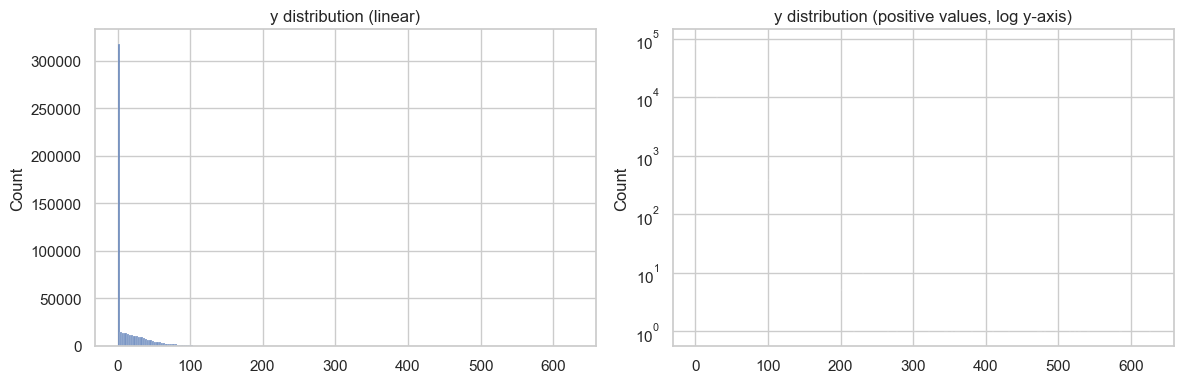

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sb.histplot(y, bins=200, ax=ax[0])
ax[0].set_title('y distribution (linear)')
sb.histplot(y[y>0], bins=200, ax=ax[1], log_scale=(False,True))
ax[1].set_title('y distribution (positive values, log y-axis)')
plt.tight_layout()
savefig(fig, 'trees_y_distribution.png')
plt.show()

Saved: ../src/visualization/plots\trees_y_by_option_type.png


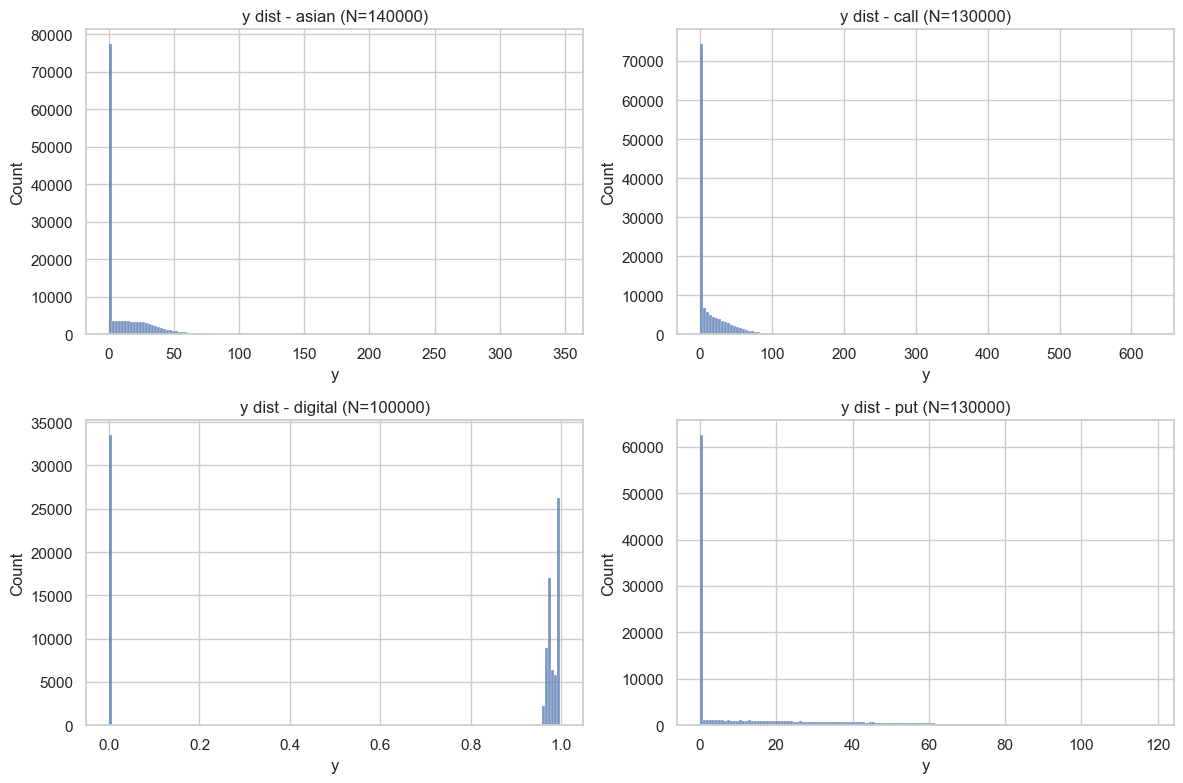

In [13]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
for (opt, subdf), ax in zip(DF.groupby('option_flag'), ax.flatten()):
    sb.histplot(subdf['y'], bins=150, ax=ax)
    ax.set_title(f'y dist - {opt} (N={len(subdf)})')
plt.tight_layout()
savefig(fig, 'trees_y_by_option_type.png')
plt.show()

In [14]:
n_zero = (y==0).sum()
n_negative = (y<0).sum()
print(f"Zero labels: {n_zero}, Negative labels: {n_negative}")

Zero labels: 235536, Negative labels: 0


Saved: ../src/visualization/plots\trees_params_histograms.png


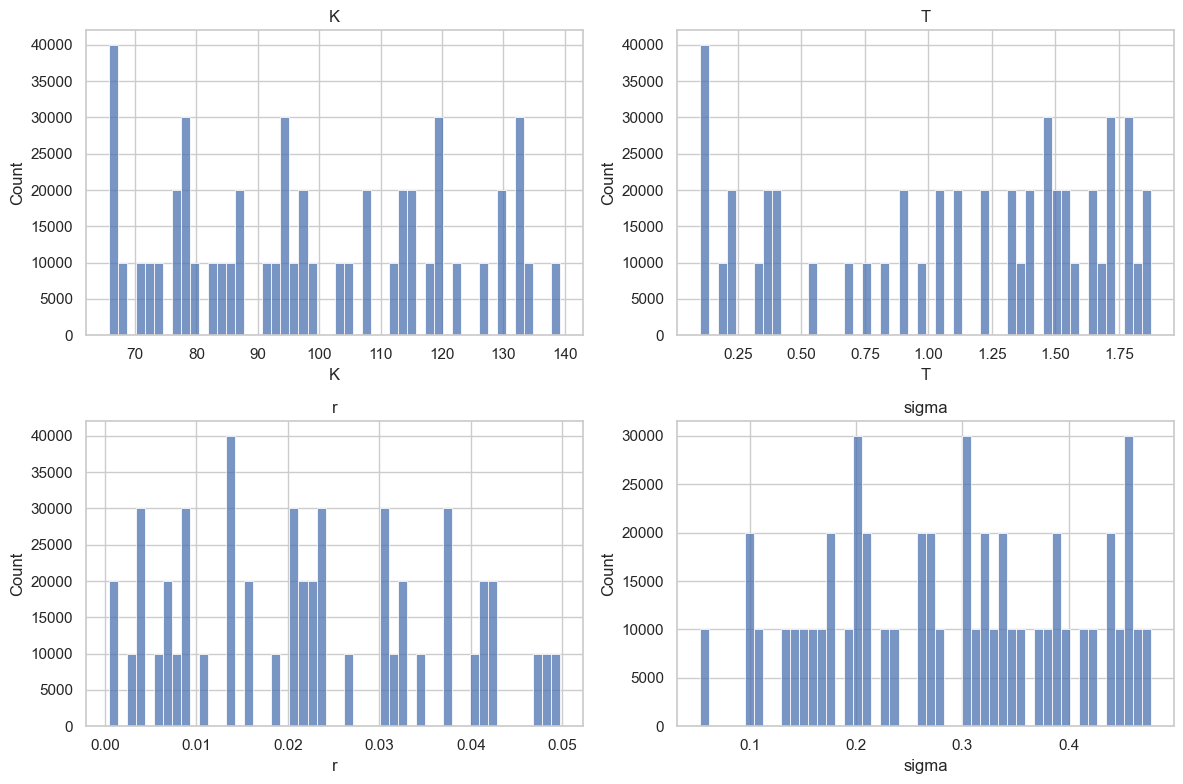

In [15]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
for col, ax in zip(['K','T','r','sigma'], axes.flatten()):
    sb.histplot(DF[col], bins=50, ax=ax)
    ax.set_title(col)
plt.tight_layout()
savefig(fig, 'trees_params_histograms.png')
plt.show()

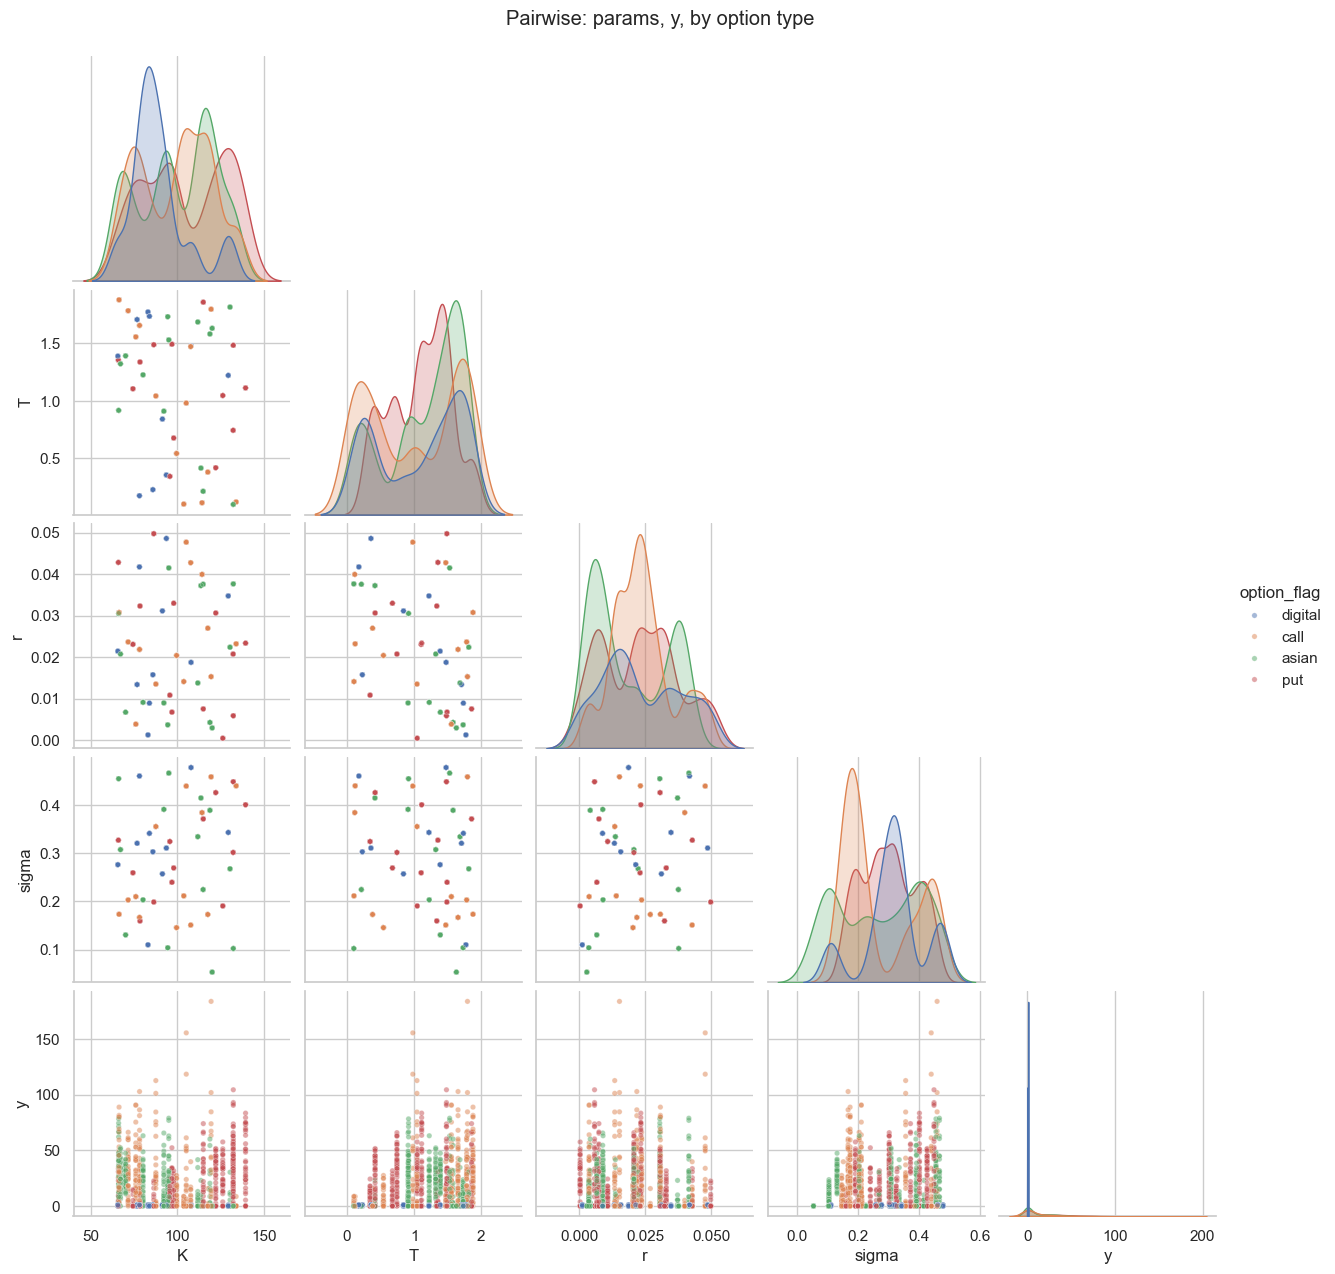

In [16]:
# Pairwise relationships for params (sample subset to keep plotting fast)
sample = DF.sample(n=min(2000, len(DF)), random_state=42)
pp = sb.pairplot(sample[['K','T','r','sigma','y','option_flag']], hue='option_flag', corner=True, plot_kws={'alpha':0.5, 's':15})
pp.fig.suptitle('Pairwise: params, y, by option type', y=1.02)
pp.savefig(os.path.join(OUT_DIR, 'trees_pairwise_params_y.png'))

Saved: ../src/visualization/plots\trees_correlation_matrix.png


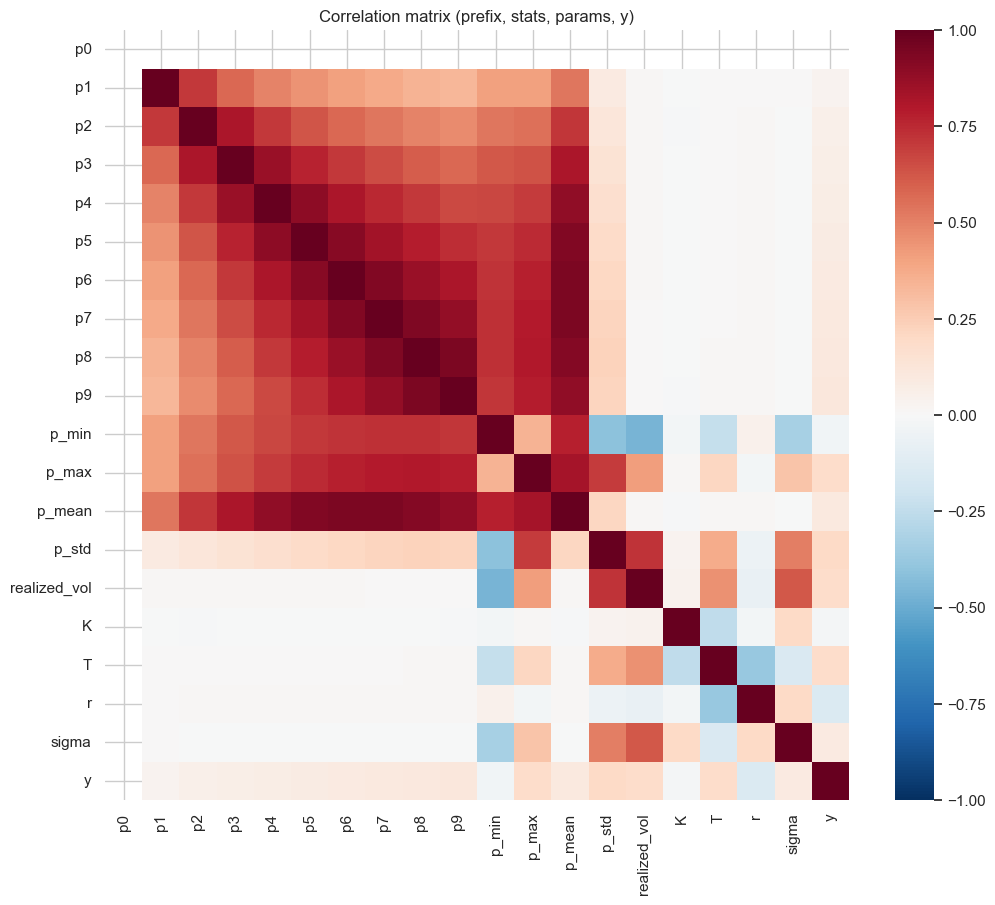

In [17]:
# Examine correlations (only numeric columns)
num_cols = col_prefix + col_stats + ['K','T','r','sigma','y']
corr = DF[num_cols].corr()
fig, ax = plt.subplots(figsize=(12,10))
sb.heatmap(corr, cmap='RdBu_r', center=0, vmax=1, vmin=-1, ax=ax)
ax.set_title('Correlation matrix (prefix, stats, params, y)')
savefig(fig, 'trees_correlation_matrix.png')
plt.show()

Training LightGBM quick baseline for feature importance...
Training until validation scores don't improve for 20 rounds
[50]	training's l2: 227.285	valid_1's l2: 243.14
[100]	training's l2: 217.373	valid_1's l2: 239.392
Early stopping, best iteration is:
[89]	training's l2: 218.75	valid_1's l2: 239.276
            feature  importance
9                p9         657
15                K         442
19  option_flag_cat         232
16                T         217
18            sigma         130
17                r         128
1                p1         105
8                p8         101
14     realized_vol          84
11            p_max          72
12           p_mean          71
6                p6          69
2                p2          68
4                p4          65
10            p_min          65
13            p_std          53
3                p3          48
7                p7          38
5                p5          25
0                p0           0
Saved: ../src/visualizat

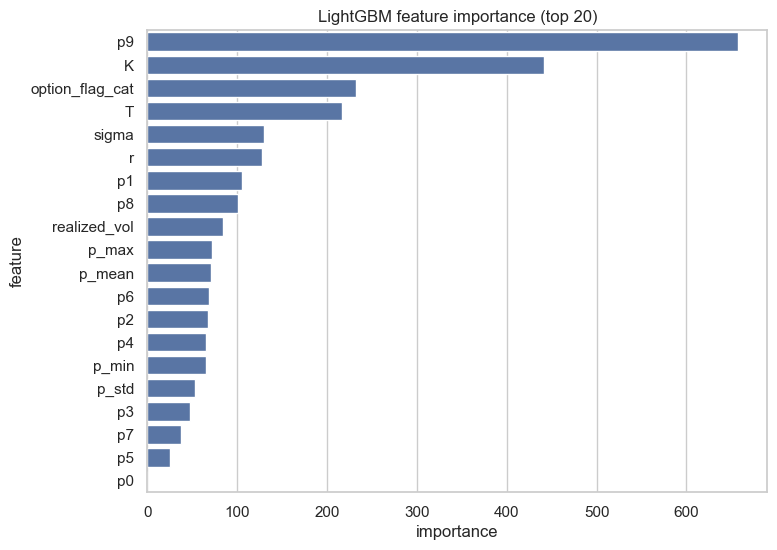

In [21]:
# Feature importance baseline using LightGBM (quick)
try:
    import sys
    !{sys.executable} -m pip install lightgbm
    import lightgbm as lgb
    
    print('Training LightGBM quick baseline for feature importance...')
    # Use a small subset for speed
    N = min(200000, len(DF))
    df_sub = DF.sample(N, random_state=42)
    X_feats = df_sub.drop(columns=['y','option_flag'])
    # Encode option_flag as numeric categories
    X_feats['option_flag_cat'] = df_sub['option_flag'].map({'put':0,'call':1,'digital':2,'asian':3}).astype(int)
    y_feats = df_sub['y']

    # Quick train/valid split
    from sklearn.model_selection import train_test_split
    X_tr, X_val, y_tr, y_val = train_test_split(X_feats, y_feats, test_size=0.2, random_state=42)

    lgb_train = lgb.Dataset(X_tr, label=y_tr)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)
    params = {'objective':'regression','metric':'l2','verbosity':-1, 'learning_rate':0.05, 'num_leaves':31}
    gbm = lgb.train(
        params,
        lgb_train,
        num_boost_round=200,
        valid_sets=[lgb_train, lgb_val],
        callbacks=[
            lgb.early_stopping(stopping_rounds=20),
            lgb.log_evaluation(period=50)
        ]
    )

    # feature importance
    imp = pd.DataFrame({'feature': X_feats.columns, 'importance': gbm.feature_importance()}).sort_values('importance', ascending=False)
    print(imp.head(30))
    fig, ax = plt.subplots(figsize=(8,6))
    sb.barplot(data=imp.head(20), x='importance', y='feature', ax=ax)
    ax.set_title('LightGBM feature importance (top 20)')
    savefig(fig, 'lgbm_feature_importance.png')
    plt.show()
    
except Exception as e:
    print('LightGBM not available or failed to run:', e)

In [22]:
stats = DF.groupby('option_flag')[['p_mean','p_std','p_min','p_max','realized_vol','y']].agg(['mean','std','median'])
print(stats)
stats.to_csv(os.path.join(OUT_DIR,'per_option_stats.csv'))
print('Saved per-option summary to CSV')

                 p_mean                           p_std                      \
                   mean       std      median      mean       std    median   
option_flag                                                                   
asian        100.135313  7.920311   99.924937  4.797943  3.694407  4.077768   
call         100.242863  6.845226  100.024287  4.066085  3.287521  3.121276   
digital      100.172214  8.085186   99.873993  5.132337  3.447531  4.221827   
put          100.202576  7.871295   99.923524  5.142155  3.112688  4.336914   

                 p_min                            p_max             \
                  mean       std     median        mean        std   
option_flag                                                          
asian        92.771823  8.338107  95.797698  107.987205  10.742079   
call         93.971186  7.245472  96.304665  106.871230   9.425839   
digital      92.274678  8.222167  94.631440  108.566023  10.638608   
put          92.292309  7.

Residuals summary:
count    5.000000e+05
mean     3.237801e-16
std      2.069156e+01
min     -6.669221e+01
25%     -1.219404e+01
50%     -6.222024e+00
75%      4.517259e+00
max      5.792151e+02
Name: y, dtype: float64
Saved: ../src/visualization/plots\residuals_linear_fit.png


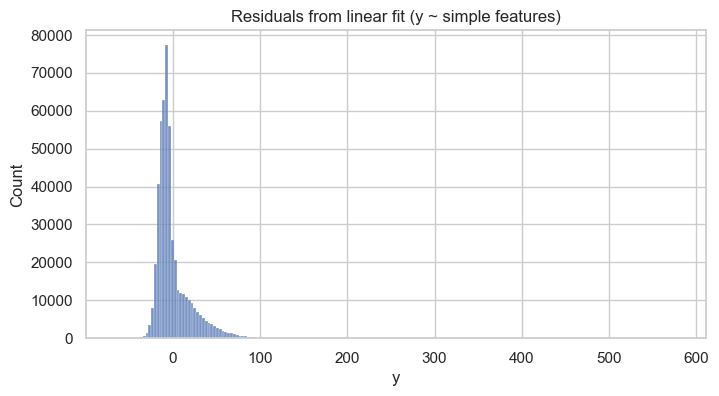

Outliers count (abs resid > 99.9pct=130.462): 500


In [23]:
from sklearn.linear_model import LinearRegression
lr_feats = ['p_mean','p_std','p_min','p_max','realized_vol','K','T','r','sigma']
LR = LinearRegression()
LR.fit(DF[lr_feats], DF['y'])
resid = DF['y'] - LR.predict(DF[lr_feats])
DF['resid'] = resid
print('Residuals summary:')
print(resid.describe())

fig, ax = plt.subplots(figsize=(8,4))
sb.histplot(resid, bins=200, ax=ax)
ax.set_title('Residuals from linear fit (y ~ simple features)')
savefig(fig, 'residuals_linear_fit.png')
plt.show()

th = np.percentile(np.abs(resid), 99.9)
outliers = DF[np.abs(resid) > th]
print(f'Outliers count (abs resid > 99.9pct={th:.3f}):', len(outliers))
outliers.head().to_csv(os.path.join(OUT_DIR,'outlier_samples.csv'))

In [24]:
rec = []
rec.append('EDA findings:')
rec.append(f'Total samples: {len(DF)}')
rec.append('Class distribution (option types):')
rec += [f" {k}: {v}" for k,v in DF['option_flag'].value_counts().to_dict().items()]
rec.append('Suggested preprocessing for trees:')
rec.append(' - Keep raw features; tree models do not require scaling.')
rec.append(' - Encode option_flag as categorical integer or one-hot depending on model (GBM supports categorical directly).')
rec.append(' - Consider clipping NN predictions to be >=0 or training with non-negative targets if using regression models.')
rec.append(' - Digitals have many near-0 labels; consider oversampling digitals or using separate models for discrete payoffs.')
rec.append(' - Feature importance from LightGBM shows which prefix/time features matter; use those for feature selection. (see lgbm_feature_importance.png)')


with open(os.path.join(OUT_DIR,'eda_recommendations.txt'),'w') as f:
    f.write('\n'.join(rec))